In [50]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [51]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
# from IPython.html.widgets import FloatProgress
# from IPython.display import display
# import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp



/home/vsivadas/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




In [52]:
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

# Cluster Analysis in SuSi

There are some important functions in susi for cluster analysis. 

In [53]:
path = 'rhor1_phi40_yd10.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])



In [54]:
positions = dataset.particles.r
fluid_velocity = dataset.fluid.u
L = dataset.L # Domain size
LEs = dataset.LEs  # Lees-Edwards shift at time dataset.t
LEu = dataset.LEu  # Lees-Edwards velocity

If they are not specified, the above assume their default values, which can be found in susi.wrapper.extract_sim_characteristics()

In [55]:
# sim_chars.keys()

## Radial Distribution function 

<IPython.core.display.Javascript object>


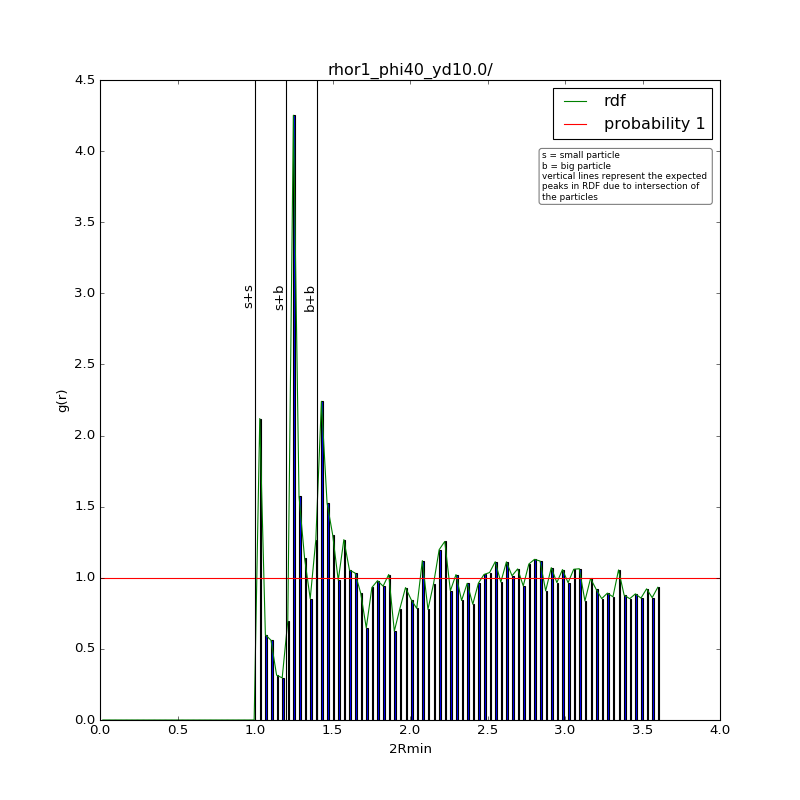

In [56]:
sim_chars = sp.susi.extract_sim_characteristics(dataset)
sim_chars['histogram'] = {'bins': 100, 'range': (0, 2.8376564979553224e-05)}

rdf = sp.spatial.radial_distribution_function(positions,**sim_chars)
plt.figure(figsize=[10,10])
plt.plot(rdf[0]/(2*np.min(sim_chars['radius'])),rdf[1],"g",label="rdf")
plt.bar(rdf[0]/np.min(2*np.min(sim_chars['radius'])),rdf[1],width = 1.0/sim_chars['histogram']['bins'])
plt.axhline(1.0,color="r",label="probability 1")

# s = sim_chars['radius'].min()
# b = sim_chars['radius'].max()

s = 4
b = 11.2/2
import inspect, re
        
def plot_vline(loc, text):
    plt.axvline(loc/float(2*s),color="k")
    plt.text(loc/float(2*s),3,text, ha = 'right',rotation=90)

plot_vline(s+s,"s+s")
plot_vline(s+b,"s+b")
plot_vline(b+b,"b+b")

# plot_vline(s+s+s,"s+s+s")
# plot_vline(s+s+b,"s+s+b")
# plot_vline(s+b+b,"s+b+b")
# plot_vline(b+b+b,"b+b+b")

# plot_vline(s+s+s+s,"s+s+s+s")
# plot_vline(s+s+s+b,"s+s+s+b")
# plot_vline(s+s+b+b,"s+s+b+b")
# plot_vline(s+b+b+b,"s+b+b+b")
# plot_vline(b+b+b+b,"b+b+b+b")

plt.legend()
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(2.85, 4, "s = small particle \nb = big particle \nvertical lines represent the expected \npeaks in RDF due to intersection of \nthe particles"
         , fontsize=8,verticalalignment='top', bbox=props, wrap=True)
plt.xlabel("2Rmin")
plt.ylabel("g(r)")
plt.title(path)
plt.savefig("radial_distribution_function")

## Pair distribution function (Susipop.filter.PairDistributionFunction2D)

In [57]:
sim_chars = sp.susi.extract_sim_characteristics(dataset)
sim_chars['histogram'] = {'bins': 100, 'range': (0, 2.8376564979553224e-05)}
sim_chars['histogramdd']={"bins":(20, 20, 20)}
pdf = sp.spatial.pair_distribution_function(positions,**sim_chars)



In [58]:
from matplotlib.patches import Circle  # $matplotlib/patches.py

def circle( xy, radius, color="lightsteelblue", facecolor="none", alpha=1, ax=None ):
    """ add a circle to ax= or current axes
    """
        # from .../pylab_examples/ellipse_demo.py
    e = Circle( xy=xy, radius=radius )
    if ax is None:
        ax = plt.gca()  # ax = subplot( 1,1,1 )
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_edgecolor( color )
    e.set_facecolor( facecolor )  # "none" not None
    e.set_alpha( alpha )
    
def plot_pdf(path):
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    sim_chars['histogramdd']={"bins":(30,30,30)}
    pdf2d = filter.PairDistributionFunction2D(dataset,**sim_chars)
    X = pdf2d[0]/1e-6
    Y = pdf2d[1]/1e-6
    Z = pdf2d[2]
    plt.figure()
    im = plt.imshow(Z, extent=(X.min(), X.max(), Y.max(), Y.min()),interpolation='bicubic')


    plt.title(path)
    plt.colorbar(im)

# print np.sort(get_folder_list())
# s = 4
# b = 11.2/2
# for path in np.sort(get_folder_list()[:]):
#     try:
#         plot_pdf(path)
#     except Exception as e:
#         print e
#         continue

## Plot the radial distribution function g(r) as a function of distance


<IPython.core.display.Javascript object>


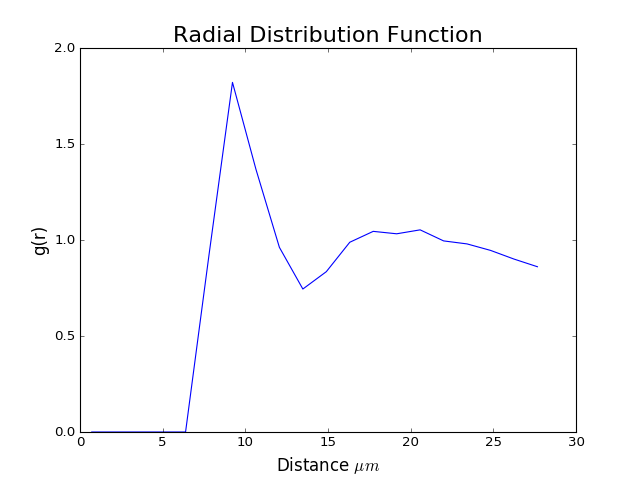

In [59]:
path = 'rhor1_phi56_yd10.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])


exp = dataset
plt.figure();
# print exp.keys()
# sim_chars = sp.susi.extract_sim_characteristics(exp)
# sim_chars['histogram'] = {'bins': 1000, 'range': (0, 2.8376564979553224e-05)}
# exp['histogram'] = sim_chars['histogram']
# exp['bin'] = 1000
# print exp['bins']

distance, rdf = exp['radial_distribution_function']
plt.plot(distance * 1e6, rdf);
plt.xlabel('Distance $\mu{m}$',fontsize=15);
plt.ylabel('g(r)', fontsize=15);
plt.title('Radial Distribution Function', fontsize=20);

## Lampros standard code for PDF (pair distribution function)

<IPython.core.display.Javascript object>


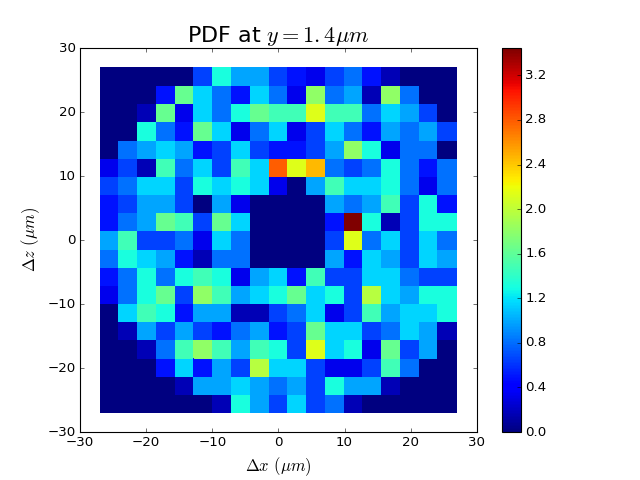

In [60]:

path = 'rhor1_phi56_yd10.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])
exp = dataset

plt.figure();
distance, pdf = exp['pair_distribution_function']

XX, ZZ = np.meshgrid(distance[0], distance[2])
pdf = pdf[:, pdf.shape[1] / 2, :]

plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pdf)
plt.colorbar()
y_mum = 1e6 * distance[1][pdf.shape[1] / 2]

plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
plt.title('PDF at $y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

## Eric Code for PDF

In [109]:
# Eric's code for a PDF with higher resolution


path = 'rhor1_phi56_yd1.0/'
type = "xy"

def plot_pdf(phi,shearrate,type='xz'):
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    exp = dataset

    #Create the size of the area that you want to bin the distances in
    limit = 5 * exp.particles.radius.max()
    print (exp.particles.radius.max())
    print (limit)
    bins = 41

    #Calculate the distances and bin them
    (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
         L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})

    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    if type == 'xz':
#         plt.figure()
        XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
        pairdf = pair_df[:, pair_df.shape[1] / 2, :]

        plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf, vmin=0, vmax=10)
        plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
        y_mum =  1e6 * ( edges[1][i+1] -edges[1][i] )    
        
        plt.axis([-16,16,-16,16])
        plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
        plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
        plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
        print "ymum="+str(y_mum)

    #X-Y PLANE
    elif type == 'xy':
#         plt.figure()
        XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
        pairdf = pair_df[:,:, pair_df.shape[2] / 2]

        plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        plt.colorbar()
        z_mum = 1e6 * edges[2][pair_df.shape[2] / 2]

        plt.axis([-16,16,-16,16])
        plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
        plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
        plt.title('PDF at $z={:.2f} \mu{{m}}$'.format(z_mum), fontsize=20);

    #Y-Z PLANE
    elif type == 'yz':
#         plt.figure()
        YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
        pairdf = pair_df[pair_df.shape[0] / 2,:,:]

        plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
        plt.colorbar()
        x_mum = 1e6 * edges[0][pair_df.shape[0] / 2]

        plt.axis([-16,16,-16,16])
        plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
        plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
        plt.title('PDF at $x={:.2f} \mu{{m}}$'.format(x_mum), fontsize=20);
    else:
        print ""

<IPython.core.display.Javascript object>


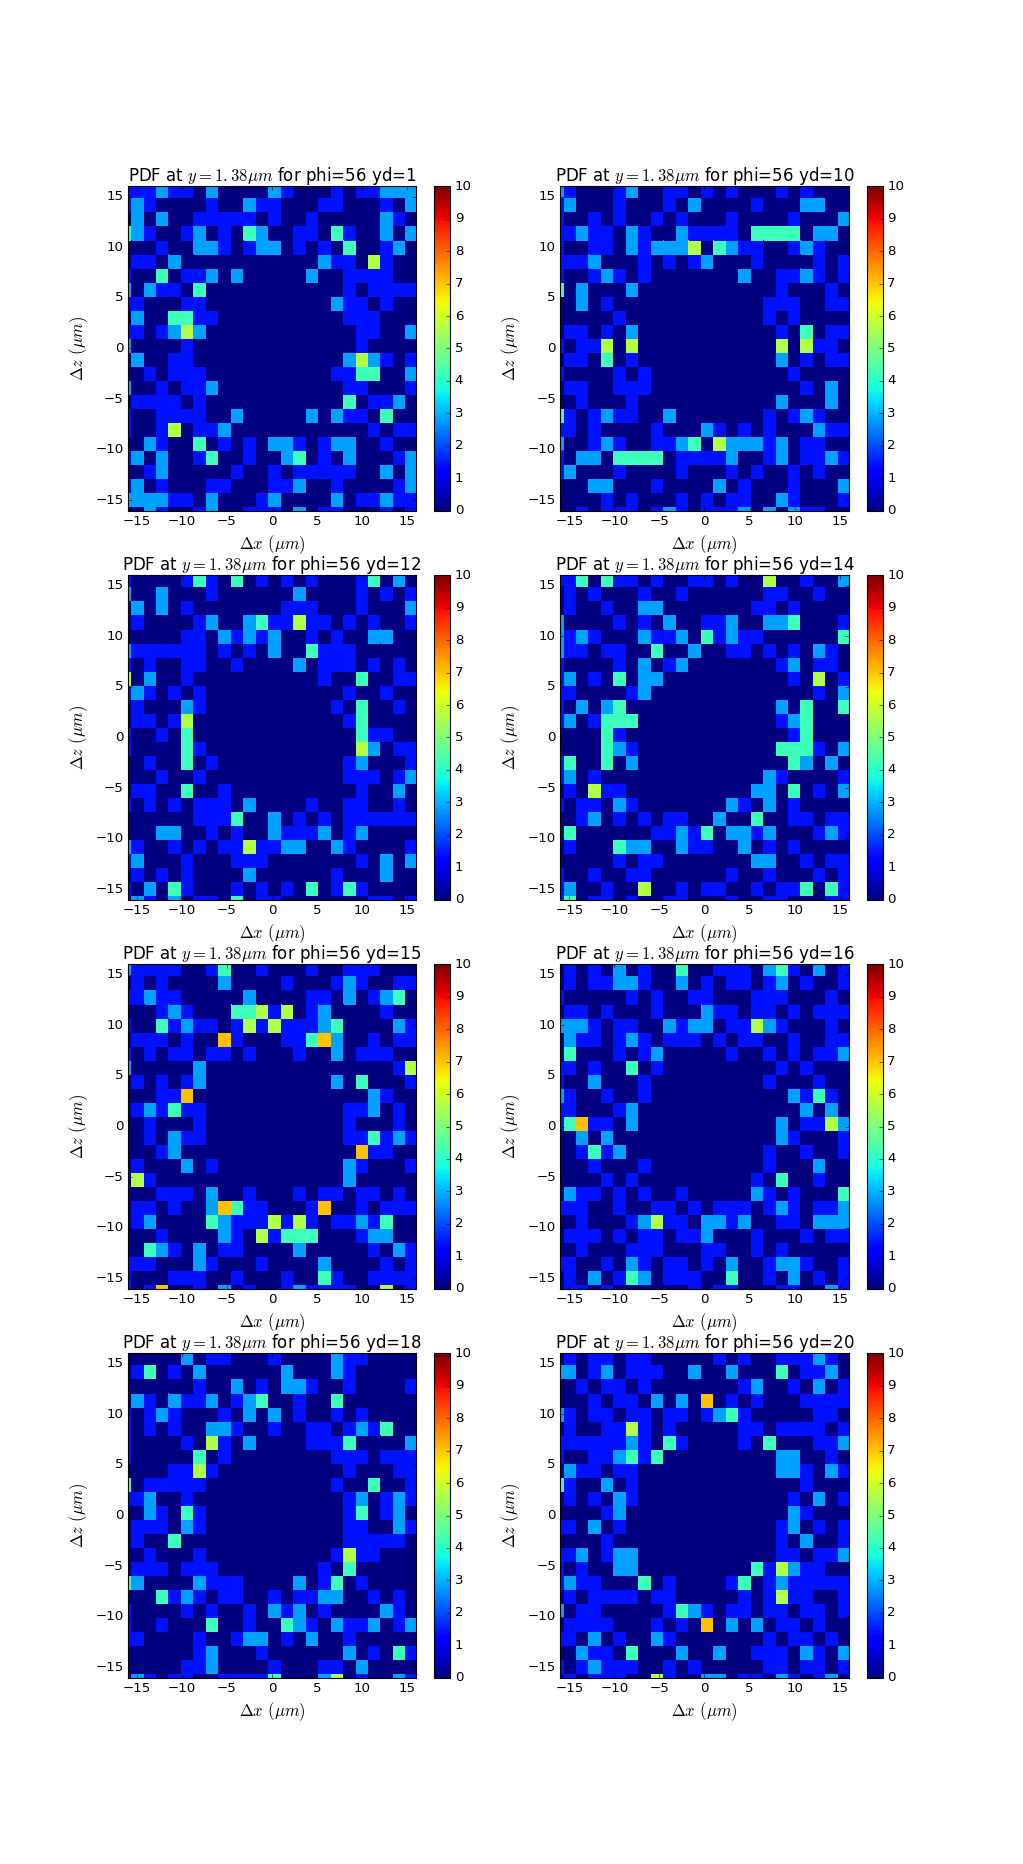

5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193
5.67531299591e-06
2.83765649796e-05
ymum=1.38422268193


In [110]:
phi=56
shearrate = [1,10,12,14,15,16,18,20]
plt.figure(figsize=[13,8*len(shearrate)/2])
j = len(shearrate)
for i,yd in enumerate(shearrate):  
    plt.subplot(int(j/2.0),2,i+1)
    plot_pdf(phi,yd)
    

In [103]:
for i in range(20):
    print   

-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
-1.38422268193e-06
